In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
import nltk

In [30]:
import pandas as pd
df = pd.read_csv('C:/Users/Admin/TNTT/spam2.csv')
if 'v1' in df.columns:
    df['label_num'] = df['v1'].map({'ham': 0, 'spam': 1})
    print(df.sample(50)) 
else:
    print("Cột 'label' không tồn tại trong dữ liệu.")


        v1                                                 v2  label_num
443    ham  Cảm ơn bạn đã hoàn thành báo cáo. Chúng ta sẽ ...          0
449    ham  Xin vui lòng gửi các tài liệu cập nhật trước c...          0
380   spam  Chúng tôi đang tổ chức chương trình khuyến mãi...          1
727   spam  "Chúc mừng! Bạn vừa nhận được một mã giảm giá ...          1
701   spam  "Đã gửi yêu cầu hủy tài khoản. Nếu đây không p...          1
911    ham  "Chúng tôi gửi kèm lịch tập luyện của đội tuyể...          0
905    ham  "Hãy chuẩn bị hành lý! Đừng quên chuyến bay củ...          0
277    ham  Cảm ơn bạn đã hoàn thành báo cáo. Chúng ta sẽ ...          0
122   spam  Bạn đã trúng thưởng giải đặc biệt! Nhấn vào li...          1
86    spam  Đăng ký gói cước Internet tốc độ cao với giá ư...          1
185   spam  Bạn đã trúng một chiếc xe máy trị giá 20 triệu...          1
78     ham  Cảm ơn bạn đã gửi tài liệu. Tôi sẽ xem qua và ...          0
464   spam  Bạn đã trúng giải thưởng trị giá 500 tr

In [31]:
import os
print(os.getcwd())

c:\Users\Admin\TNTT


In [32]:
df.groupby('v1').describe()

label_num                                   
         count mean  std  min  25%  50%  75%  max
v1                                               
ham      469.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam     566.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [33]:
df_spam = df[df['v1'] == 'spam']
df_spam.shape

(566, 3)

In [34]:
df_ham = df[df['v1'] == 'ham']
df_ham.shape

(469, 3)

In [35]:
df_spam_downsampled = df_spam.sample(df_ham.shape[0])

In [36]:
df_spam_downsampled.shape

(469, 3)

In [37]:
import pandas as pd
df_balanced = pd.concat([df_ham, df_spam_downsampled])
df_balanced.shape

(938, 3)

In [38]:
import tensorflow as tf
import tensorflow_hub as hub

In [39]:
import pandas as pd
import re
from pyvi import ViTokenizer
import torch

In [40]:
from transformers import AutoTokenizer,TFAutoModel

In [41]:
with open('vietnamesestopwords.txt','r',encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

In [42]:
import pandas as pd
import re
from pyvi import ViTokenizer
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf


# Đọc file stop words
with open('vietnamesestopwords.txt', 'r', encoding='utf-8') as f:
    stop_words = set(f.read().splitlines())
# Phân tích từ vựng
def preprocess_text(text,update_vocab=False):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()
    tokens = ViTokenizer.tokenize(text).split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)
    if update_vocab:
        for tokens in tokens:
            if '_' in token:  # Nếu là từ ghép
                tu_ghep[token] = tu_ghep.get(token, 0) + 1
            else:  # Nếu là từ đơn
                tu_don[token] = tu_don.get(token, 0) + 1
    
    return tokens



# Đọc dữ liệu và kiểm tra tên cột
df = pd.read_csv('C:/Users/Admin/TNTT/spam2.csv')
print(df.columns)

# Thay đổi 'content' thành tên chính xác của cột chứa văn bản
df['text_clean'] = df['v2'].apply(preprocess_text)

# Token hóa và trích xuất đặc trưng
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
phobert_model = TFAutoModel.from_pretrained("vinai/phobert-base")

# Token hóa dữ liệu
inputs = tokenizer(list(df['text_clean']), padding=True, truncation=True, max_length=128, return_tensors="tf")

# Trích xuất đặc trưng
outputs = phobert_model(**inputs)
features = tf.reduce_mean(outputs.last_hidden_state, axis=1).numpy()
df['label_num'] = df['v1'].map({'ham': 0, 'spam': 1})
df['features'] = list(features)
print('dactrung:',features)
print('dataframe:\n',df.head(5))

Index(['v1', 'v2'], dtype='object')


Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


dactrung: [[-0.41668627  0.18929327 -0.05087732 ...  0.3651294   0.06323797
   0.35236698]
 [-0.31832653  0.13188325 -0.32343972 ... -0.21357262  0.12501216
   0.5438246 ]
 [-0.04886744  0.26065183  0.09950838 ... -0.24126723 -0.37797898
  -0.39327592]
 ...
 [ 0.11018094 -0.20966606 -0.5366519  ...  0.02592074  0.03693758
   0.12734732]
 [-0.10915512  0.07084335 -0.1330945  ...  0.05829268 -0.36715865
  -0.08543804]
 [-0.18636608  0.6216414  -0.1130905  ... -0.30031997 -0.19595163
  -0.00519484]]
dataframe:
     v1                                                 v2  \
0  ham  Cuộc họp tiếp theo của chúng ta sẽ diễn ra vào...   
1  ham  Anh có thể gửi giúp em file tài liệu mà anh đã...   
2  ham  Chào bạn, lâu rồi không gặp! Bạn có rảnh để đi...   
3  ham  Nhóm dự án sẽ triển khai bản demo vào tuần sau...   
4  ham  Cảm ơn bạn đã đến tham gia hội thảo hôm qua. H...   

                                          text_clean  label_num  \
0         họp tiếp_theo chúng_ta diễn h mời tham_gia

In [43]:
df['label_num'] = df['v1'].map({'ham': 0, 'spam': 1})


In [44]:
from sklearn.model_selection import train_test_split
import numpy as np

In [45]:
X = np.array(df['features'].tolist()) 
y = df['label_num'].values 
X_train_val, X_test, y_train_val,y_test = train_test_split(X,y,test_size = 0.2)

In [46]:
X_train, X_val, y_train,y_val = train_test_split(X_train_val,y_train_val,test_size = 0.2)

In [47]:
X_train.shape

(662, 768)

In [48]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Confusion Matrix:
 [[ 86  10]
 [  7 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91        96
           1       0.91      0.94      0.92       111

    accuracy                           0.92       207
   macro avg       0.92      0.92      0.92       207
weighted avg       0.92      0.92      0.92       207



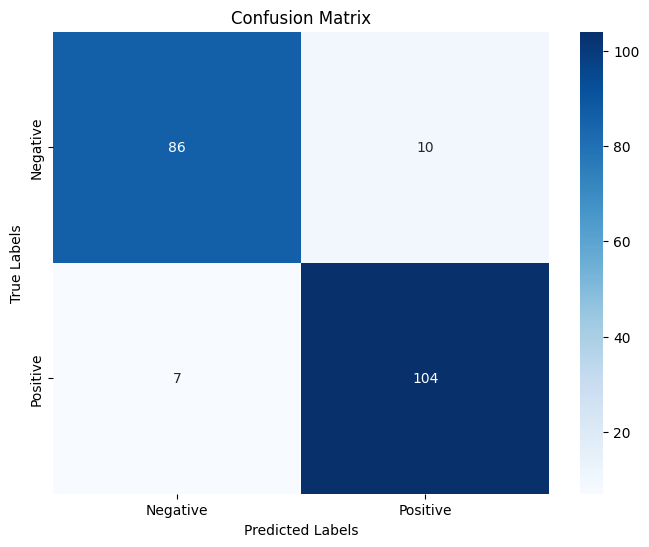

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



In [50]:
import joblib
joblib.dump(model, 'spam_classifier.joblib')

['spam_classifier.joblib']

In [51]:

rf_model = joblib.load('spam_classifier.joblib')

In [52]:


new_email = "chúc mừng bạn đã nhận được tiền "
new_email_clean = preprocess_text(new_email)
new_email_tokenized = tokenizer(new_email_clean, padding=True, truncation=True, max_length=128, return_tensors="tf")
new_email_features = tf.reduce_mean(phobert_model(**new_email_tokenized).last_hidden_state, axis=1).numpy()

# Kết quả dự đoán
print("Dự đoán:", rf_model.predict(new_email_features))


Dự đoán: [0]
